In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
from multipole_kernels.multipole_kernels import multipole_kernels as mk

In [3]:
tf.reset_default_graph()
mk1 = mk(kernel_size=[21], input_filters=2, output_filters=[2, 2], ℓ=[0, 1])
mk2 = mk(kernel_size=[21, 21], input_filters=2, output_filters=[2, 2], ℓ=[0, 1])
mk3 = mk(kernel_size=[21, 21, 21], input_filters=2, ℓ=[0, 1], output_filters=[2, 2])

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [5]:
a = sess.run(mk1.kernel)

In [22]:
print(mk1.num_params)
print(a.shape)
print(np.prod(a.shape))

128
(21, 2, 4)
168


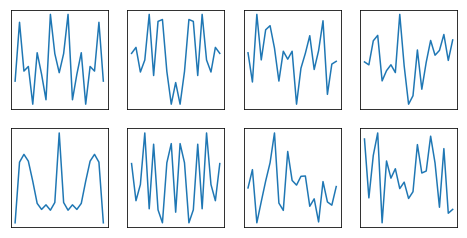

In [19]:
fig, ax = plt.subplots(a.shape[1], a.shape[2], figsize=(2 * a.shape[2], 2 * a.shape[1]))
for i in range(a.shape[1]):
    for j in range(a.shape[2]):
        ax[i, j].plot(a[:, i, j])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

In [8]:
b = sess.run(mk2.kernel)

In [23]:
print(mk2.num_params)
print(b.shape)
print(np.prod(b.shape))

596
(21, 21, 2, 6)
5292


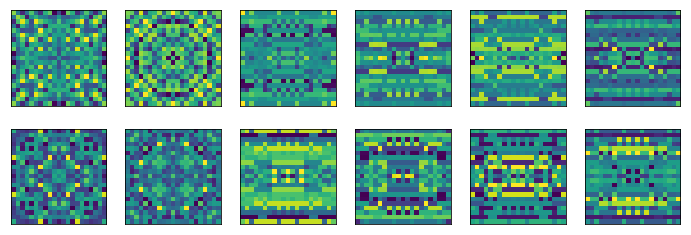

In [24]:
fig, ax = plt.subplots(b.shape[2], b.shape[3], figsize=(2 * b.shape[3], 2 * b.shape[2]))
for i in range(b.shape[2]):
    for j in range(b.shape[3]):
        ax[i, j].imshow(b[:, :, i, j])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

In [11]:
d = sess.run(mk3.kernel)

In [21]:
print(d.shape)
print(mk3.num_params)
print(np.prod(d.shape))

(21, 21, 21, 2, 8)
18840
148176


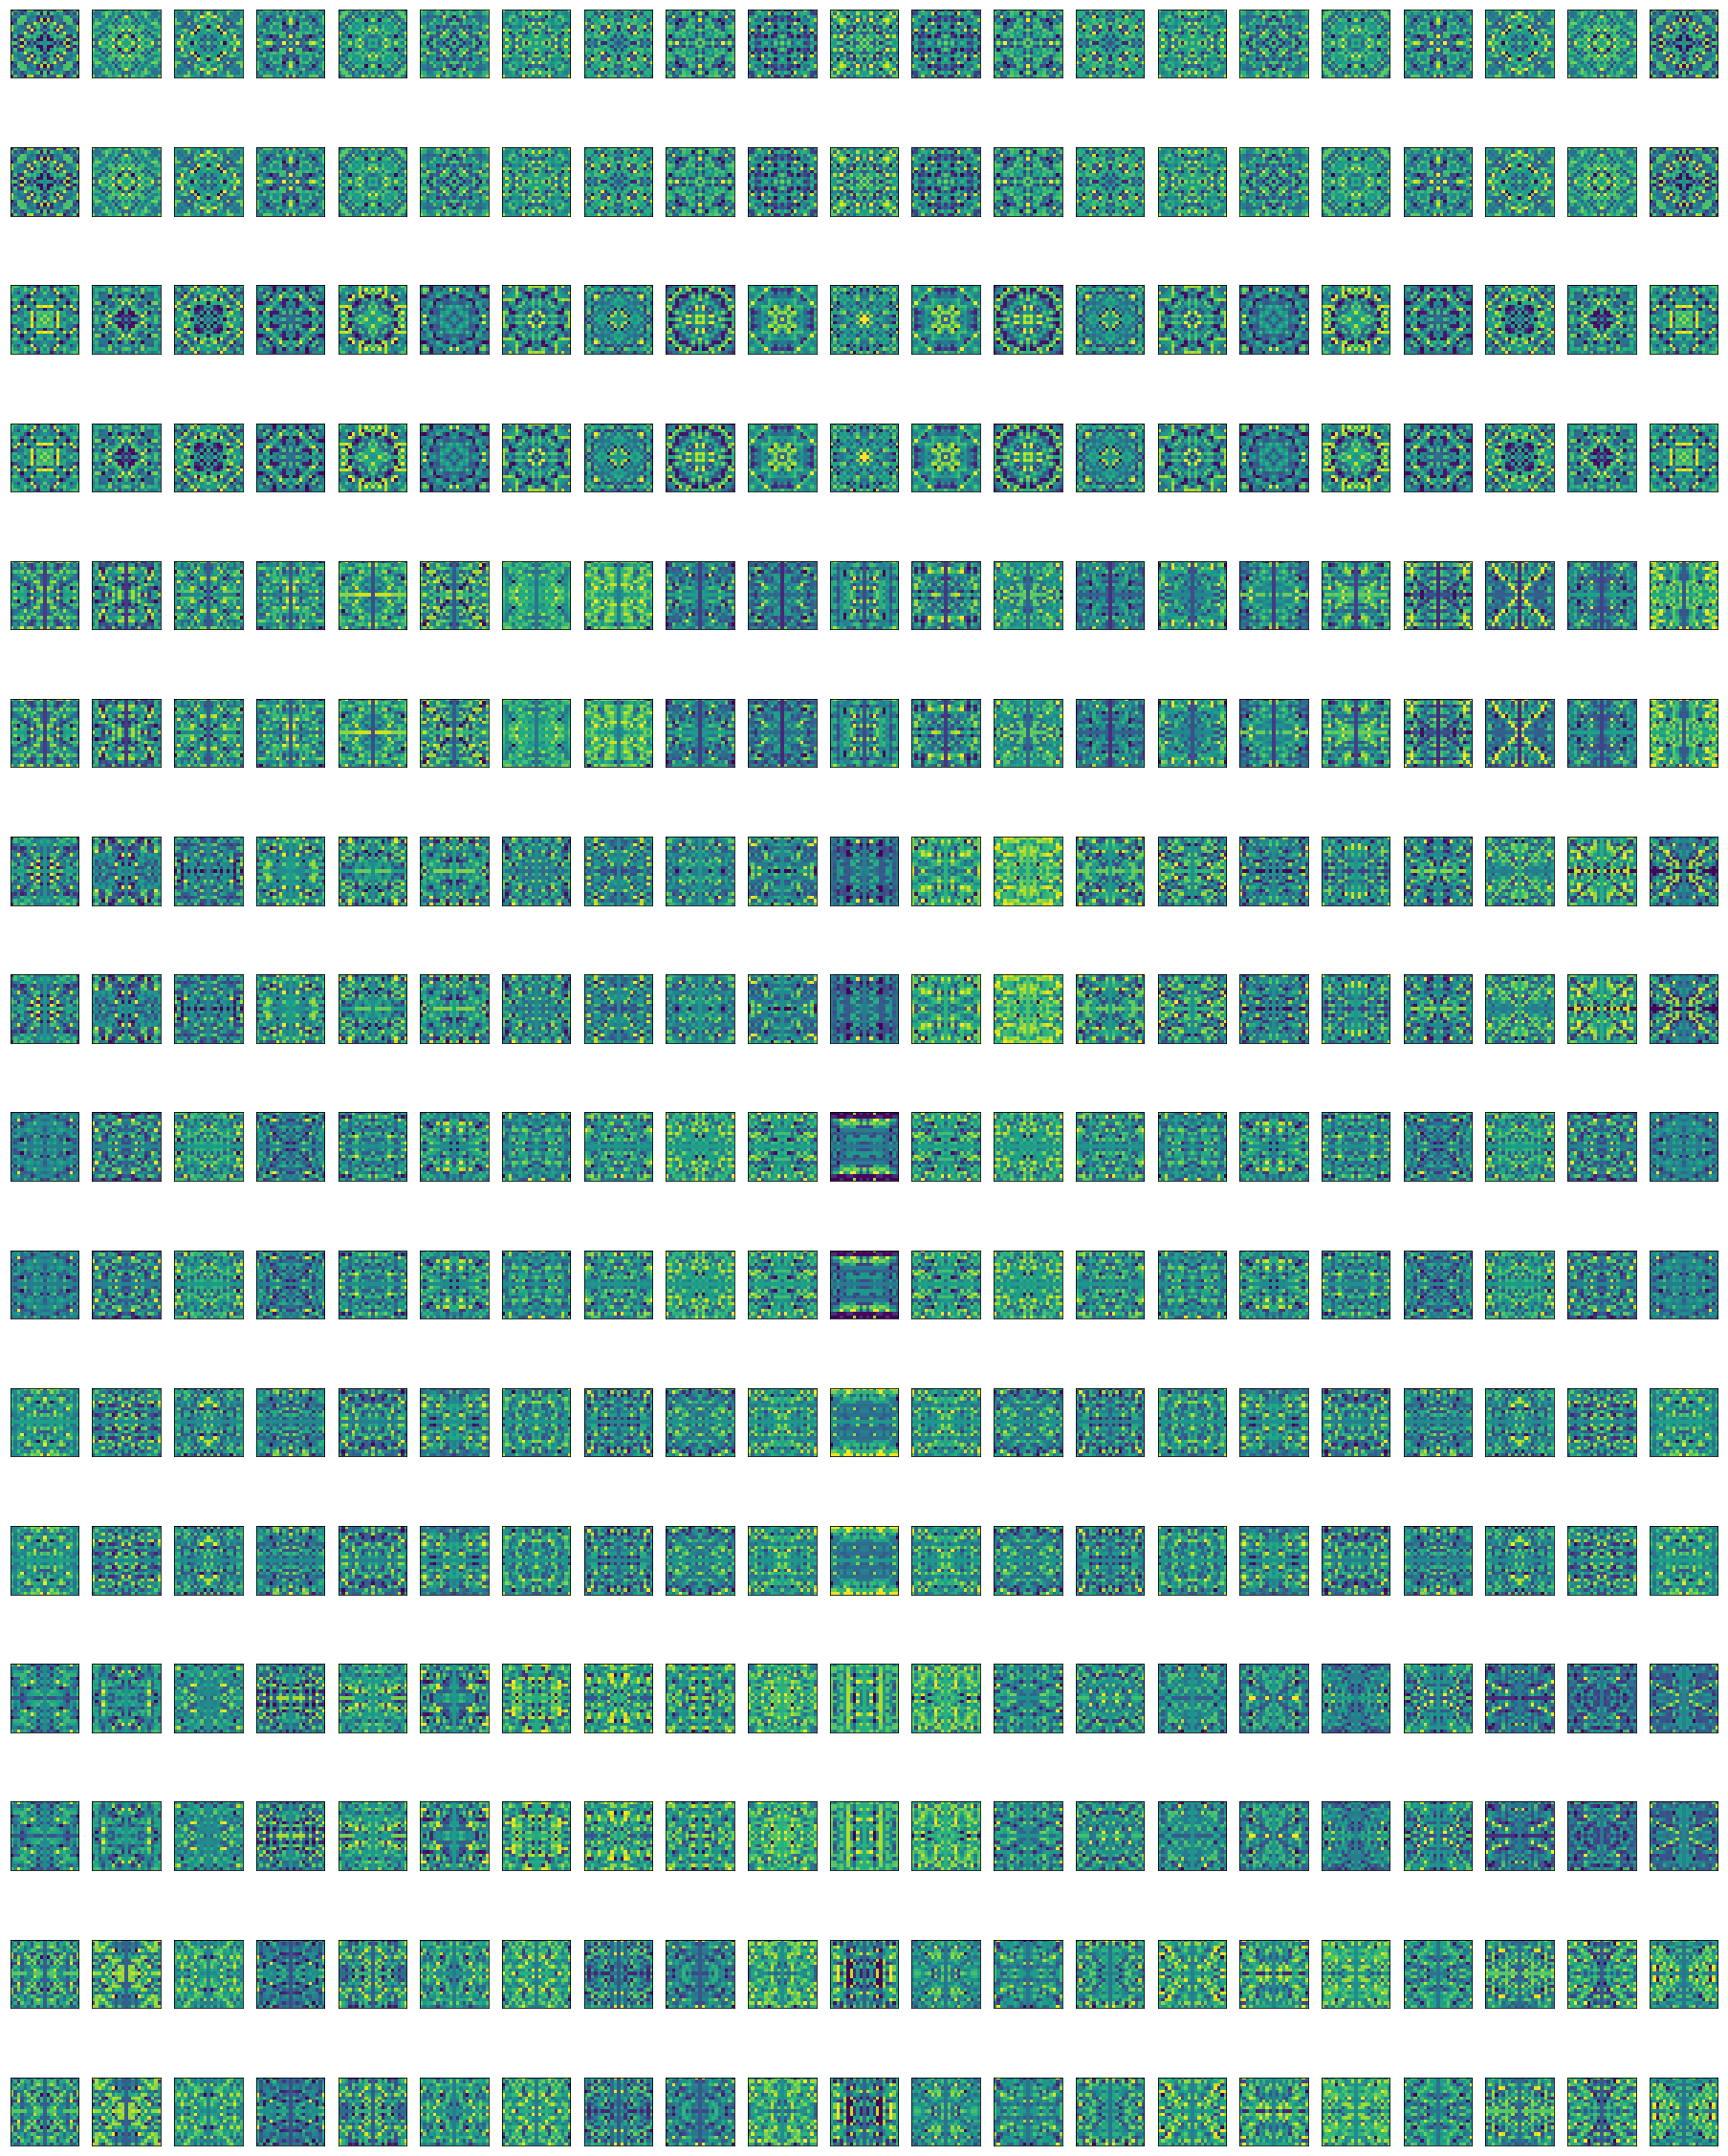

In [20]:
fig, ax = plt.subplots(d.shape[-2] * d.shape[-1], d.shape[2], figsize=(2 * d.shape[-2] * d.shape[-1], 2 * d.shape[2]))
for i in range(d.shape[-2] * d.shape[-1]):
    for j in range(d.shape[2]):
        ax[i, j].imshow(d[:, :, j, i // d.shape[-1], i // d.shape[-2]])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])